In [97]:
! pip install sweetviz

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sweetviz as sv

In [99]:
df = pd.read_csv('churn_data.csv')

In [100]:
# converts total charges from string to float
df['Total Charges'] = df['Total Charges'].replace(r'^\s*$', np.nan, regex=True)
df['Total Charges'] = df['Total Charges'].astype(float)
#choosing variables apart from latitude, longitude, zip code
df1 = df[['Country', 'State', 'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method','Monthly Charges', 'Total Charges', 'CLTV','Churn Value']]
df1.head()


,Country,State,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,Churn Value
0,United States,California,Los Angeles,Male,No,No,No,2,Yes,No,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,3239,1
1,United States,California,Los Angeles,Female,No,No,Yes,2,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,2701,1
2,United States,California,Los Angeles,Female,No,No,Yes,8,Yes,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,5372,1
3,United States,California,Los Angeles,Female,No,Yes,Yes,28,Yes,Yes,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,5003,1
4,United States,California,Los Angeles,Male,No,No,Yes,49,Yes,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,5340,1


In [101]:
#one hot encodeing all variables
df_encoded = pd.get_dummies(df1, columns=['Gender', 'Senior Citizen', 'Partner', 'Dependents','Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security','Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV','Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'], drop_first=True)

In [102]:
# Scaling continuous variable
scaler = StandardScaler()
df_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']] = scaler.fit_transform(df_encoded[['Tenure Months', 'Monthly Charges', 'Total Charges', 'CLTV']])
df_encoded.head()

,Country,State,City,Tenure Months,Monthly Charges,Total Charges,CLTV,Churn Value,Gender_Male,Senior Citizen_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,United States,California,Los Angeles,-1.236724,-0.362660,-0.959649,-0.981675,1,1,0,...,0,0,0,0,0,0,1,0,0,1
1,United States,California,Los Angeles,-1.236724,0.197365,-0.940457,-1.436462,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,United States,California,Los Angeles,-0.992402,1.159546,-0.645369,0.821409,1,0,0,...,0,1,0,1,0,0,1,0,1,0
3,United States,California,Los Angeles,-0.177995,1.330711,0.336516,0.509483,1,0,0,...,0,1,0,1,0,0,1,0,1,0
4,United States,California,Los Angeles,0.677133,1.294151,1.214589,0.794358,1,1,0,...,0,1,0,1,0,0,1,0,0,0


## Using Lasso for Feature Selection

In [103]:
df_encoded = df_encoded.dropna()

In [104]:
y = df_encoded['Churn Value']

In [105]:
X = df_encoded.drop(['Churn Value', 'Country','State','City'], axis = 1)

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV

scaler = StandardScaler()
X_std = scaler.fit_transform(X)


# Instantiate LassoCV object with cross-validation
lasso_cv = LassoCV(cv=5)

# Fit the LassoCV object to the data
lasso_cv.fit(X_std, y)
print("Optimal alpha:", lasso_cv.alpha_)

coef = lasso_cv.coef_
relevant_features = X.columns[coef != 0]
print(relevant_features)
print(len(relevant_features))

Optimal alpha: 0.000156401409823596
Index(['Tenure Months', 'Total Charges', 'CLTV', 'Gender_Male',
       'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Phone Service_Yes', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_Fiber optic',
       'Internet Service_No', 'Online Security_Yes',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No internet service', 'Device Protection_Yes',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No internet service', 'Streaming TV_Yes',
       'Streaming Movies_Yes', 'Contract_One year', 'Contract_Two year',
       'Paperless Billing_Yes', 'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')
28


In [107]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_std, y)
lasso_coef = lasso.coef_
important_features = X.columns[lasso_coef != 0]
print(important_features)
print(len(important_features))

Index(['Tenure Months', 'Total Charges', 'CLTV', 'Gender_Male',
       'Senior Citizen_Yes', 'Partner_Yes', 'Dependents_Yes',
       'Phone Service_Yes', 'Multiple Lines_Yes',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_Yes', 'Online Backup_No internet service',
       'Online Backup_Yes', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No internet service',
       'Tech Support_Yes', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_Yes', 'Contract_One year',
       'Contract_Two year', 'Paperless Billing_Yes',
       'Payment Method_Credit card (automatic)',
       'Payment Method_Electronic check', 'Payment Method_Mailed check'],
      dtype='object')
27


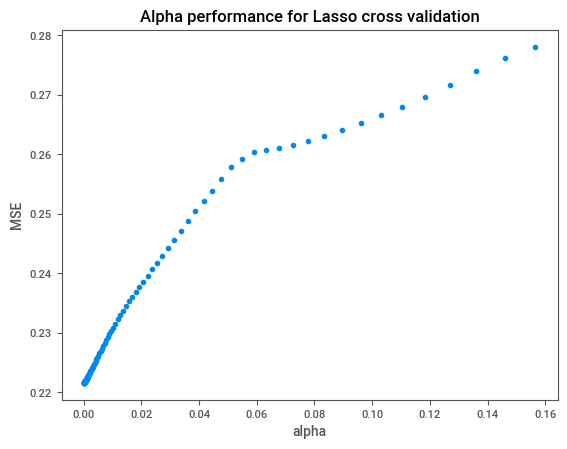

Optimal alpha is 0.00016 with an MSE of 0.22157983433971434


In [108]:
import matplotlib.ticker as mticker

lowest_MSE = np.inf
best_alpha = 0
mse_list = []
alpha_list= []
for alpha, mse in zip(lasso_cv.alphas_, lasso_cv.mse_path_.mean(axis=1)):
    if mse < lowest_MSE:
        lowest_MSE = mse
        best_alpha = alpha
    mse_list.append(mse)
    alpha_list.append(alpha)

plt.figure()
plt.scatter(alpha_list,mse_list)
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("Alpha performance for Lasso cross validation")
plt.show()
print(f"Optimal alpha is {round(best_alpha,5)} with an MSE of {lowest_MSE}")
 

## K_means clustering

In [114]:
from sklearn.cluster import KMeans

k=2
kmeans = KMeans(n_clusters=k).fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print(labels[:10])

[0 0 0 1 1 0 0 0 1 0]
